In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# os.chdir('C:/Users/Axe-Yue-CHEN/Desktop/Online-Food-Merchant-Recommendation-Based-on-the-Meituan-Waimai-Application')

## 0 Read Data

In [3]:
# read user

In [4]:
path = './原数据-20210301-20210328/users.txt'
users = pd.read_csv(path, sep = "\t")

In [5]:
users['avg_pay_amt'].apply(lambda x: str(x).split(','))

0         [[36, 49)]
1         [[49, 65)]
2              [<29]
3         [[49, 65)]
4         [[36, 49)]
             ...    
199995    [[36, 49)]
199996        [>=65]
199997    [[36, 49)]
199998         [<29]
199999         [<29]
Name: avg_pay_amt, Length: 200000, dtype: object

In [6]:
# read pois
path = './原数据-20210301-20210328/pois.txt'
pois = pd.read_csv(path, sep = "\t")

In [7]:
# read orders

In [8]:
path = './原数据-20210301-20210328/orders_train.txt'
orders_train = pd.read_csv(path, sep = "\t")

In [9]:
orders_train.head()
# orders_train

,user_id,wm_order_id,wm_poi_id,aor_id,order_price_interval,order_timestamp,ord_period_name,order_scene_name,aoi_id,takedlvr_aoi_type_name,dt
0,120037,0,1806,0,<29,1614557985,0,未知,0.0,0,20210301
1,135109,1,970,6,>=65,1614561844,1,0,NaN,未知,20210301
2,146736,2,1945,6,"[29,36)",1614588773,2,未知,1.0,0,20210301
3,83644,3,708,6,>=65,1614599916,3,1,2.0,0,20210301
4,117903,4,2366,6,"[29,36)",1614595418,3,1,3.0,1,20210301


In [10]:
min(orders_train['dt'])

20210301

In [11]:
path = './原数据-label-20210301-20210328/orders_poi_test_label.txt'
orders_test = pd.read_csv(path, sep = "\t")

In [12]:
orders_test.head()

,user_id,wm_order_id,wm_poi_id,dt
0,140760,1068495,2198,20210322
1,86307,1068496,3193,20210322
2,183993,1068497,1171,20210322
3,117653,1068498,629,20210322
4,120648,1068499,1719,20210322


In [13]:
# test if there is user never seen 
# result: no user never seen before
sum(pd.merge(orders_test, users, on = 'user_id', how='left')['avg_pay_amt'].isnull())

0

In [14]:
# test if there is poi never seen 
# result: no poi never seen before
sum(pd.merge(orders_test, pois, on = 'wm_poi_id', how='left')['wm_poi_name'].isnull())

0

In [15]:
len(orders_test['user_id'].unique())

108739

## 1 Cleaning Data

In [16]:
# pois

In [17]:
pois = pois[0:29070]

## Map POIs to Integers (Done)

## 2 Exploring

### Most Bought POI

In [18]:
order_sort_by_poi = orders_train.groupby('wm_poi_id').count().sort_values('user_id',ascending = False)

In [19]:
order_sort_by_poi

,user_id,wm_order_id,aor_id,order_price_interval,order_timestamp,ord_period_name,order_scene_name,aoi_id,takedlvr_aoi_type_name,dt
wm_poi_id,,,,,,,,,,
1896,4535,4535,4535,4535,4535,4535,4535,4330,4535,4535
244,4139,4139,4139,4139,4139,4139,4139,3531,4139,4139
3230,4102,4102,4102,4102,4102,4102,4102,3766,4102,4102
3193,3943,3943,3943,3943,3943,3943,3943,3647,3943,3943
2933,3868,3868,3868,3868,3868,3868,3868,3737,3868,3868
...,...,...,...,...,...,...,...,...,...,...
1153,1,1,1,1,1,1,1,1,1,1
1154,1,1,1,1,1,1,1,1,1,1
1995,1,1,1,1,1,1,1,1,1,1


## Try Collaborative Filtering for POI (need to refresh later)

In [20]:
# 先安装推荐系统库 surprise，在anaconda中运行：
# conda install -c conda-forge scikit-surprise

In [21]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [22]:
reader = Reader()

## Embedding

Data preparing

In [23]:
# user without info
users_n_info = users['user_id'].to_frame()
# users_n_info = users_n_info [:10000]

In [24]:
users

,user_id,avg_pay_amt,avg_pay_amt_weekdays,avg_pay_amt_weekends
0,0,"[36,49)","[29,36)","[36,49)"
1,1,"[49,65)","[49,65)",>=65
2,2,<29,<29,<29
3,3,"[49,65)",>=65,"[49,65)"
4,4,"[36,49)",未知,"[49,65)"
...,...,...,...,...
199995,199995,"[36,49)","[36,49)","[36,49)"
199996,199996,>=65,>=65,"[49,65)"
199997,199997,"[36,49)","[36,49)","[36,49)"
199998,199998,<29,<29,<29


In [25]:
user_index = {user: user for user in users['user_id']}
index_user = {idx: user for user, idx in user_index.items()}

In [26]:
# order record
user_poi_buy = orders_train[['user_id','wm_poi_id']]
# user_poi_buy = user_poi_buy [:3000]

In [27]:
user_poi_buy['if_buy'] = 1

C:\Users\AXE-YU~1\AppData\Local\Temp/ipykernel_11796/1166971434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_poi_buy['if_buy'] = 1


In [28]:
pois['wm_poi_id'] = pois['wm_poi_id'].astype('int')

In [29]:
poi_index = {poi: poi for poi in pois['wm_poi_id']}
index_poi = {idx: poi for poi, idx in poi_index.items()}

In [30]:
# user poi relationship 0 

In [32]:
# user_poi_0 = pd.merge(users_n_info.assign(key=1), user_poi_buy['wm_poi_id'].to_frame().assign(key=1),on='key').drop('key',1)

In [35]:
# user_poi_0['if_buy'] = 0

In [36]:
# user poi relationship

In [37]:
# user_poi_if_buy = pd.merge(user_poi_0, user_poi_buy, on = ['user_id','wm_poi_id'], how = 'left')

In [38]:
# user_poi_if_buy['if_buy'] = user_poi_if_buy['if_buy_x'] + user_poi_if_buy['if_buy_y']
# user_poi_if_buy = user_poi_if_buy[['user_id','wm_poi_id','if_buy']]
# user_poi_if_buy = user_poi_if_buy.fillna(0)

**Embedding model needs a training set.** We are going to treat this as a supervised learning problem: given a pair (user, poi), we want the neural network to learn to predict whether this is a legitimate pair - present in the data - or not.

In [39]:
# positive links between users and pois

In [40]:
user_poi_buy.head()

,user_id,wm_poi_id,if_buy
0,120037,1806,1
1,135109,970,1
2,146736,1945,1
3,83644,708,1
4,117903,2366,1


In [41]:
pos_link_list = user_poi_buy[['user_id','wm_poi_id']].values.tolist()
pos_pairs = [tuple(link) for link in pos_link_list]
pos_pairs_set = set(pos_pairs)

In [42]:
len(pos_pairs_set)

750529

In [43]:
len(pos_link_list)

1068495

In [252]:
user_poi_num = user_poi_buy.groupby(['user_id','wm_poi_id'],as_index=False).sum('if_buy')
user_poi_num_list = user_poi_num[['user_id','wm_poi_id','if_buy']].values.tolist()

In [253]:
from collections import defaultdict
user_poi_num_dict = defaultdict(dict)
for i in user_poi_num_list:
    pos_pairs_dict[0][i[1]] = i[2]

In [44]:
from collections import defaultdict
pos_pairs_dict = defaultdict(dict)
for k,v in pos_pairs_set:
    dict2 = {}
    dict2[v] = 1
    pos_pairs_dict[k][v] = 1

In [45]:
pos_pairs_dict[1]

{2044: 1, 1921: 1, 176: 1, 1725: 1, 2540: 1, 507: 1, 2043: 1, 43: 1}

In [46]:
user_poi_buy[user_poi_buy['user_id']==1]['wm_poi_id'].unique()

array([1725, 2540,  176, 1921,   43, 2044, 2043,  507], dtype=int64)

In [49]:
# negative links between users and pois

In [50]:
# user_poi_0

In [51]:
# neg_link_list = user_poi_0[['user_id','wm_poi_id']].values.tolist()
# neg_pairs = [tuple(link) for link in neg_link_list]
# neg_pairs_set = set(neg_pairs)

In [52]:
# len(neg_pairs_set)

To compute the embeddings, we are **not going to create a separate validation or testing set.** While this is a must for a normal supervised machine learning task, in this case, our primary objective is not to make the most accurate model, but to generate the best embeddings. The prediction task is just the method through which we train our network to make the embeddings. At the end of training, we are not going to be testing our model on new data, so we don't need to evaluate the performance. 

The code below creates **a generator that yields batches of samples each time it is called**. Neural networks are trained incrementally - a batch at a time - which means that a generator is a useful function for returning examples on which to train. 

In [53]:
import random
random.seed(100)
def generate_batch(pairs, n_positive = 50, negative_ratio = 1.0, classification = True):
    """Generate batches of samples for training"""
    batch_size = n_positive * (1 + negative_ratio)
    batch = np.zeros((batch_size, 3))
    
    # Adjust label based on task
    if classification:
        neg_label = 0
    else:
        neg_label = -1
    
    # This creates a generator
    while True:
        # randomly choose positive examples
        for idx, (user_id, wm_poi_id) in enumerate(random.sample(pairs, n_positive)):
            batch[idx, :] = (user_id, wm_poi_id, 1)

        # Increment idx by 1
        idx += 1
        
        # Add negative examples until reach batch size
        while idx < batch_size:
            
            # random selection
            random_user = random.randrange(len(users))
            random_poi = random.randrange(len(pois))
            
            # Check to make sure this is not a positive example
            if (random_user, random_poi) not in pos_pairs_set:
                
                # Add to batch and increment index
                batch[idx, :] = (random_user, random_poi, neg_label)
                idx += 1
                
        # Make sure to shuffle order
        np.random.shuffle(batch)
        yield {'user': batch[:, 0], 'poi': batch[:, 1]}, batch[:, 2]

In [54]:
next(generate_batch(pos_pairs, n_positive = 2, negative_ratio = 3))

({'user': array([132871., 177770.,  91681., 103031.,  28827.,  45809., 120751.,
         119256.]),
  'poi': array([26215.,  2897., 14205., 23984., 17462., 23118.,    48., 25257.])},
 array([0., 1., 0., 0., 0., 0., 1., 0.]))

**Neural Network Embedding Model**

In [55]:
# pip install keras

In [56]:
# pip install tensorflow

In [65]:
import keras
from keras.layers import Input, Embedding, Dot, Reshape, Dense
from keras.models import Model

In [58]:
def user_embedding_model(embedding_size = 50, classification = False):
    """Model to embed users and pois using the functional API.
       Trained to discern if a link is present in the user poi pairs (which is orders)"""
    
    # Both inputs are 1-dimensional
    user = Input(name = 'user', shape = [1])
    poi = Input(name = 'poi', shape = [1])
    
    # Embedding the user (shape will be (None, 1, 50))
    user_embedding = Embedding(name = 'user_embedding',
                               input_dim = len(users['user_id']),
                               output_dim = embedding_size)(user)
    
    # Embedding the poi (shape will be (None, 1, 50))
    poi_embedding = Embedding(name = 'poi_embedding',
                               input_dim = len(pois['wm_poi_id']),
                               output_dim = embedding_size)(poi)
    
    # Merge the layers with a dot product along the second axis (shape will be (None, 1, 1))
    merged = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, poi_embedding])
    
    # Reshape to be a single number (shape will be (None, 1))
    merged = Reshape(target_shape = [1])(merged)
    
    # If classifcation, add extra layer and loss function is binary cross entropy
    if classification:
        merged = Dense(1, activation = 'sigmoid')(merged)
        model = Model(inputs = [user, poi], outputs = merged)
        model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    # Otherwise loss function is mean squared error
    else:
        model = Model(inputs = [user, poi], outputs = merged)
        model.compile(optimizer = 'Adam', loss = 'mse')
    
    return model

# Instantiate model and show parameters
model = user_embedding_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 poi (InputLayer)               [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 50)        10000000    ['user[0][0]']                   
                                                                                                  
 poi_embedding (Embedding)      (None, 1, 50)        1453500     ['poi[0][0]']                    
                                                                                              

**Train Embedding Model**

In [60]:
n_positive = 1024

gen = generate_batch(pos_pairs, n_positive, negative_ratio = 2)

# Train
h = model.fit(x = gen, epochs = 15,steps_per_epoch = len(pos_pairs) // n_positive,verbose = 2)

In [ ]:
model.save('./models/first_attempt.h5')

In [82]:
model = keras.models.load_model('./models/first_attempt.h5')

**Extract Embeddings and Analyze**

In [83]:
# Extract embeddings
user_layer = model.get_layer('user_embedding')
user_weights = user_layer.get_weights()[0]
user_weights.shape

(200000, 50)

Each user is now represented as a 50-dimensional vector.

We need to normalize the embeddings so that the dot product between two embeddings becomes the cosine similarity.

In [84]:
user_weights = user_weights / np.linalg.norm(user_weights, axis = 1).reshape((-1, 1))
user_weights[0][:10]
np.sum(np.square(user_weights[0]))

1.0

Normalize just means divide each vector by the square root of the sum of squared components.

**Finding Similar users**

Function to Find Most Similar Entities

The function below takes in either a user or a poi, a set of embeddings, and returns the n most similar items to the query. It does this by computing the dot product between the query and embeddings. Because we normalized the embeddings, the dot product represents the cosine similarity between two vectors. This is a measure of similarity that does not depend on the magnitude of the vector in contrast to the Euclidean distance.

Once we have the dot products, we can sort the results to find the closest entities in the embedding space. With cosine similarity, higher numbers indicate entities that are closer together, with -1 the furthest apart and +1 closest together.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 15

def find_similar(name, weights, index_name = 'user', n = 10, least = False, return_dist = False, plot = False):
    """Find n most similar items (or least) to name based on embeddings. Option to also plot the results"""
    
    # Select index and reverse index
    if index_name == 'user':
        index = user_index
    elif index_name == 'poi':
        index = poi_index
    
    # Check to make sure `name` is in index
    try:
        # Calculate dot product between book and all others
        dists = np.dot(weights, weights[index[name]])
    except KeyError:
        print(f'{name} Not Found.')
        return
    
    # Sort distance indexes from smallest to largest
    sorted_dists = np.argsort(dists)
    
    # Plot results if specified
    if plot:
        
        # Find furthest and closest items
        furthest = sorted_dists[:(n // 2)]
        closest = sorted_dists[-n-1: len(dists) - 1]
        items = [index[c] for c in furthest]
        items.extend(index[c] for c in closest)
        
        # Find furthest and closets distances
        distances = [dists[c] for c in furthest]
        distances.extend(dists[c] for c in closest)
        
        colors = ['r' for _ in range(n //2)]
        colors.extend('g' for _ in range(n))
        
        data = pd.DataFrame({'distance': distances}, index = items)
        
        # Horizontal bar chart
        data['distance'].plot.barh(color = colors, figsize = (10, 8),
                                   edgecolor = 'k', linewidth = 2)
        plt.xlabel('Cosine Similarity');
        plt.axvline(x = 0, color = 'k');
        
        # Formatting for italicized title
        name_str = f'{index_name.capitalize()}s Most and Least Similar to'
        for word in str(name).split():
            # Title uses latex for italize
            name_str += ' $\it{' + word + '}$'
        plt.title(name_str, x = 0.2, size = 28, y = 1.05)
        
        return None
    
    # If specified, find the least similar
    if least:
        # Take the first n from sorted distances
        closest = sorted_dists[:n]
         
        print(f'{index_name.capitalize()}s furthest from {name}.\n')
        
    # Otherwise find the most similar
    else:
        # Take the last n sorted distances
        closest = sorted_dists[-n:]
        
        # Need distances later on
        if return_dist:
            return dists, closest
        
        
        print(f'{index_name.capitalize()}s closest to {name}.\n')
        
    # Need distances later on
    if return_dist:
        return dists, closest
    
    
    # Print formatting
    max_width = 6
    
    # Print the most similar and distances
    for c in reversed(closest):
        print(f'{index_name.capitalize()}: {index[c]:{max_width + 2}} Similarity: {dists[c]:.{2}}')
        
    

In [86]:
find_similar(20000, user_weights, index_name='user', n = 10, least = False)

Users closest to 20000.

User:    20000 Similarity: 1.0
User:    92908 Similarity: 0.98
User:    11497 Similarity: 0.98
User:   154020 Similarity: 0.98
User:   110904 Similarity: 0.98
User:   115241 Similarity: 0.98
User:   153573 Similarity: 0.98
User:   183310 Similarity: 0.98
User:   106814 Similarity: 0.98
User:    71779 Similarity: 0.98


**Finding Similar pois**

In [87]:
def extract_weights(name, model):
    """Extract weights from a neural network model"""
    
    # Extract weights
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    
    # Normalize
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

In [88]:
poi_weights = extract_weights('poi_embedding', model)

In [89]:
find_similar(20000, poi_weights, index_name='poi', n = 10, least = False)

Pois closest to 20000.

Poi:    20000 Similarity: 1.0
Poi:     7804 Similarity: 0.6
Poi:    28373 Similarity: 0.59
Poi:    13880 Similarity: 0.58
Poi:    19624 Similarity: 0.57
Poi:     7850 Similarity: 0.55
Poi:    21925 Similarity: 0.55
Poi:    12570 Similarity: 0.55
Poi:    21639 Similarity: 0.54
Poi:    26934 Similarity: 0.53


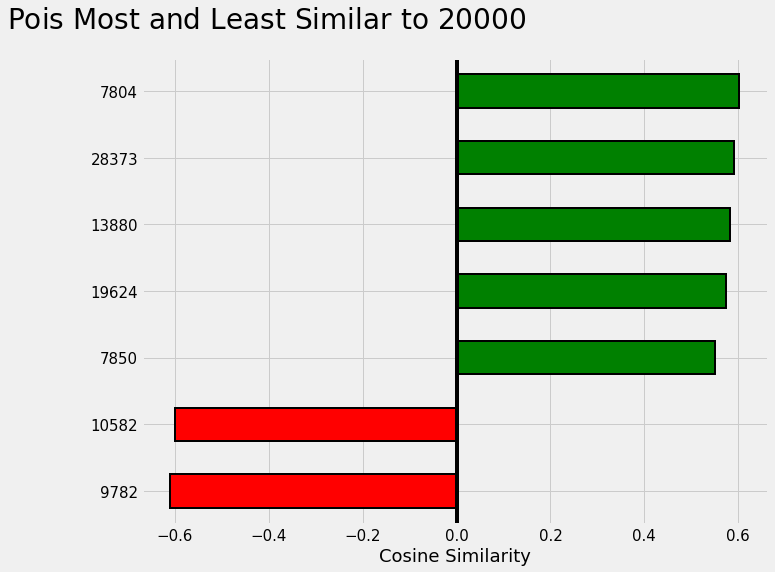

In [90]:
find_similar(20000, poi_weights, index_name='poi', n=5, plot=True)

## Classification Model

For this model, the negative examples receive a label of 0 and the loss function is binary cross entropy. The procedure for the neural network to learn the embeddings is exactly the same, only it will be optimizing for a slightly different measure.

In [78]:
model_class = user_embedding_model(50, classification = True)
gen = generate_batch(pos_pairs_set, n_positive, negative_ratio=2, classification = True)

In [80]:
# Train the model to learn embeddings
h = model_class.fit_generator(gen, epochs = 15, steps_per_epoch= len(pos_pairs_set) // n_positive, verbose = 0)

In [ ]:
model_class.save('./models/first_attempt_class.h5')

In [97]:
model_class = keras.models.load_model('./models/first_attempt_class.h5')

In [98]:
user_weights_class = extract_weights('user_embedding', model_class)
user_weights_class.shape

(200000, 50)

In [99]:
find_similar(20000, user_weights_class, n = 5)

Users closest to 20000.

User:    20000 Similarity: 1.0
User:    83341 Similarity: 0.83
User:    60907 Similarity: 0.81
User:      706 Similarity: 0.8
User:   182906 Similarity: 0.8


Things are looking pretty good with this model as well.

In [100]:
poi_weights_class = extract_weights('poi_embedding', model_class)

In [101]:
find_similar(20000, poi_weights_class, index_name = 'poi', n = 5)

Pois closest to 20000.

Poi:    20000 Similarity: 1.0
Poi:    11122 Similarity: 0.98
Poi:     7021 Similarity: 0.98
Poi:    24911 Similarity: 0.98
Poi:     7156 Similarity: 0.98


## U2I

In [254]:
def poi_recommend_4_user(user, user_weights,n):
    # user: the user to get recommend poi
    # user_weights: embedded user weight, this is to calculate user similarity
    # n: Top n pois to return
    # Gets recommendations for a person by using a weighted average of every other user's rankings
    
    totals = {}
    sim_sum = {}
    
    rankings_list =[]
    
    dists = np.dot(user_weights, user_weights[user_index[user]])
    sim_user_index = dists.argsort()[::-1][0:100] 
    
    
    
    for other_user in sim_user_index:
        user_sim = dists[other_user]

        pois_bought = user_poi_num_dict[other_user].keys()
        for poi in pois_bought:
            # Similrity * score
            totals.setdefault(poi,0)
             # make sure to extract 0 though there is no this value
            user_poi_num_dict[other_user].setdefault(poi,0)
            totals[poi] += user_poi_num_dict[other_user][poi] * user_sim
            # print(totals[poi])
            
            # sum of similarities
            sim_sum.setdefault(poi,0)
            sim_sum[poi]+= user_sim
            # print(sim_sum[poi])
        
        # print('loop done for other user:')
        # print(other_user)
    
    rankings = [(total/sim_sum[poi],poi) for poi,total in totals.items()]
    rankings.sort()
    rankings.reverse()
    recommend_list = [recommend_item for score,recommend_item in rankings]
    return recommend_list[0:n]

In [255]:
from collections import defaultdict

top_poi_4_user_dict = defaultdict(list)
for user in range(1000):
    top_poi_4_user_dict[user] = poi_recommend_4_user(user,user_weights_class,500)

In [199]:
top_poi_4_user_dict

defaultdict(list,
            {0: [1714,
              1733,
              2997,
              726,
              1202,
              1097,
              1968,
              2286,
              3237,
              2884,
              1911,
              141,
              2560,
              2572,
              117,
              575,
              2849,
              140,
              801,
              2018,
              3071,
              552,
              1659,
              825,
              1800,
              1628,
              2769,
              2603,
              3233,
              938,
              1691,
              538,
              1285,
              1639,
              570,
              3263,
              3052,
              1660,
              900,
              1063,
              574,
              1559,
              1573,
              3193,
              3041,
              2381,
              3140,
              1211,
              329,
             

In [200]:
orders_test.head()

,user_id,wm_order_id,wm_poi_id,dt
0,140760,1068495,2198,20210322
1,86307,1068496,3193,20210322
2,183993,1068497,1171,20210322
3,117653,1068498,629,20210322
4,120648,1068499,1719,20210322


In [201]:
pos_pairs_list_test = orders_test[['user_id','wm_poi_id']].values.tolist()
pos_pairs_test = [tuple(link) for link in pos_pairs_list_test]
pos_pairs_set_test = set(pos_pairs_test)

In [202]:
pos_pairs_dict_test = defaultdict(dict)
for k,v in pos_pairs_set_test:
    dict2 = {}
    dict2[v] = 1
    pos_pairs_dict_test[k][v] = 1

In [203]:
test_pairs_pos = orders_test[orders_test['user_id']<=10].values.tolist()

hit = 0
user_num = 0

for test_pair_index in range(10):
    pos_pois = pos_pairs_dict_test[test_pair_index].keys()
    
    poi_hit = 0
    for poi_index in pos_pois:
        if poi_index in top_poi_4_user_dict[test_pair_index]:
            poi_hit += 1
    
    user_num += 1
    if poi_hit >= 1:
        hit += 1
        
hit_radio = hit/user_num

In [204]:
hit_radio

0.5

In [ ]:
pos_pairs_dict[645]